In [1]:
import gym
from stable_baselines3 import PPO, DDPG, SAC
import os
from stable_baselines3.common.evaluation import evaluate_policy

os.environ["CUDA_VISIBLE_DEVICES"] = ""

/home/konrad/anaconda3/envs/car/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):
/home/konrad/anaconda3/envs/car/lib/python3.10/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:568: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (np.object, string),
/home/konrad/anaconda3/envs/car/lib/python3.10/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:569: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modi

In [11]:
env = gym.make("CarRacing-v1")

path_50k = os.path.join("training", "PPO_CnnPolicy_50k")
model_50k = PPO.load(path_50k, env=env)

path_100k = os.path.join("training", "PPO_CnnPolicy_100kv2")
model_100k = PPO.load(path_100k, env=env)

path_150k = os.path.join("training", "PPO_CnnPolicy_150k")
model_150k = PPO.load(path_150k, env=env)

path_200k = os.path.join("training", "PPO_CnnPolicy_200k")
model_200k = PPO.load(path_200k, env=env)

path_250k = os.path.join("training", "PPO_CnnPolicy_250k")
model_250k = PPO.load(path_250k, env=env)

path_300k = os.path.join("training", "PPO_CnnPolicy_300k")
model_300k = PPO.load(path_300k, env=env)

path_500k = os.path.join("training", "PPO_CnnPolicy_500k")
model_500k = PPO.load(path_500k, env=env)

/home/konrad/anaconda3/envs/car/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [3]:
result_50k = evaluate_policy(model_50k, env, n_eval_episodes=10, render=False)
print(result_50k)

/home/konrad/anaconda3/envs/car/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(410.31621540263296, 158.60835254525202)


In [12]:
result_100k = evaluate_policy(model_100k, env, n_eval_episodes=10, render=False)
print(result_100k)

/home/konrad/anaconda3/envs/car/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(383.7222042374313, 180.85933264939564)


In [5]:
result_150k = evaluate_policy(model_150k, env, n_eval_episodes=10, render=False)
print(result_150k)

(301.8425316475332, 161.8218149569359)


In [6]:
result_200k = evaluate_policy(model_200k, env, n_eval_episodes=10, render=False)
print(result_200k)

(826.7237700909376, 193.6546101113886)


In [7]:
result_250k = evaluate_policy(model_250k, env, n_eval_episodes=10, render=False)
print(result_250k)

(825.0856734797359, 84.33529221069931)


In [8]:
result_300k = evaluate_policy(model_300k, env, n_eval_episodes=10, render=False)
print(result_300k)

(839.8684432774783, 178.0023433045295)


In [9]:
result_500k = evaluate_policy(model_500k, env, n_eval_episodes=10, render=False)
print(result_500k)

(878.7514425493777, 34.56326243327295)


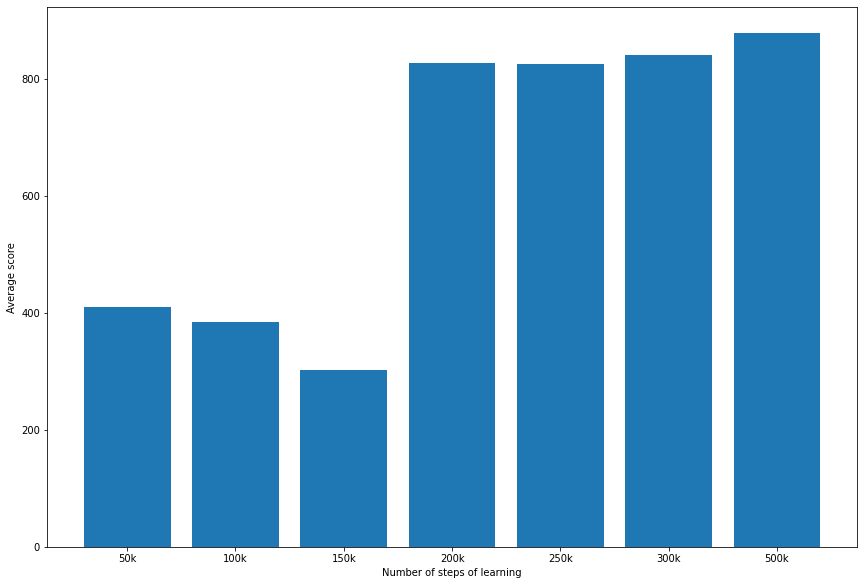

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75])
ax.set_xlabel("Number of steps of learning")
ax.set_ylabel("Average score")
iters = ["50k", "100k", "150k", "200k", "250k", "300k", "500k"]
results = [
    result_50k[0],
    result_100k[0],
    result_150k[0],
    result_200k[0],
    result_250k[0],
    result_300k[0],
    result_500k[0],
]

ax.bar(iters, results)
plt.savefig("iters-vs-score.png")